In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/simple-linear-regression/kc_house_data.csv


# Practice Lab: Linear Regression

Welcome to your first practice lab! In this lab, you will implement linear regression with one variable to predict profits for a restaurant franchise.


# Outline
- [ 1 - Packages ](#1)
- [ 2 - Linear regression with one variable ](#2)
  - [ 2.1 Problem Statement](#2.1)
  - [ 2.2  Dataset](#2.2)
  - [ 2.3 Refresher on linear regression](#2.3)
  - [ 2.4  Compute Cost](#2.4)
    - [ Exercise 1](#ex01)
  - [ 2.5 Gradient descent ](#2.5)
    - [ Exercise 2](#ex02)
  - [ 2.6 Learning parameters using batch gradient descent ](#2.6)

<a name="1"></a>
## 1 - Packages 

First, let's run the cell below to import all the packages that you will need during this assignment.
- [numpy](www.numpy.org) is the fundamental package for working with matrices in Python.
- [matplotlib](http://matplotlib.org) is a famous library to plot graphs in Python.
- ``utils.py`` contains helper functions for this assignment. You do not need to modify code in this file.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
#from utils import *
import copy
import math
%matplotlib inline

## 2 -  Problem Statement

Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet.
- You would like to expand your business to cities that may give your restaurant higher profits.
- The chain already has restaurants in various cities and you have data for profits and populations from the cities.
- You also have data on cities that are candidates for a new restaurant. 
    - For these cities, you have the city population.
    
Can you use the data to help you identify which cities may potentially give your business higher profits?

## 3 - Dataset

You will start by loading the dataset for this task. 
- The `load_data()` function shown below loads the data into variables `x_train` and `y_train`
  - `x_train` is the population of a city
  - `y_train` is the profit of a restaurant in that city. A negative value for profit indicates a loss.   
  - Both `X_train` and `y_train` are numpy arrays.

In [3]:
#load the dataset 
df = pd.read_csv('/kaggle/input/simple-linear-regression/kc_house_data.csv')
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [5]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
x_train = df['sqft_living'].values
y_train = df['price'].values

In [7]:
# print x_train
print("Type of x_train:",type(x_train))
print("First five elements of x_train are:\n", x_train[:5]) 

Type of x_train: <class 'numpy.ndarray'>
First five elements of x_train are:
 [1180 2570  770 1960 1680]


`x_train` is a numpy array that contains decimal values that are all greater than zero.
- These values represent the city population times 10,000
- For example, 6.1101 means that the population for that city is 61,101
  
Now, let's print `y_train`

In [8]:
# print y_train
print("Type of y_train:",type(y_train))
print("First five elements of y_train are:\n", y_train[:5])  

Type of y_train: <class 'numpy.ndarray'>
First five elements of y_train are:
 [221900. 538000. 180000. 604000. 510000.]


Similarly, `y_train` is a numpy array that has decimal values, some negative, some positive.
- These represent your restaurant's average monthly profits in each city, in units of \$10,000.
  - For example, 17.592 represents \$175,920 in average monthly profits for that city.
  - -2.6807 represents -\$26,807 in average monthly loss for that city.

#### Check the dimensions of your variables

Another useful way to get familiar with your data is to view its dimensions.

Please print the shape of `x_train` and `y_train` and see how many training examples you have in your dataset.

In [9]:
print ('The shape of x_train is:', x_train.shape)
print ('The shape of y_train is: ', y_train.shape)
print ('Number of training examples (m):', len(x_train))

The shape of x_train is: (21613,)
The shape of y_train is:  (21613,)
Number of training examples (m): 21613


#### Visualize your data

It is often useful to understand the data by visualizing it. 
- For this dataset, you can use a scatter plot to visualize the data, since it has only two properties to plot (profit and population). 
- Many other problems that you will encounter in real life have more than two properties (for example, population, average household income, monthly profits, monthly sales).When you have more than two properties, you can still use a scatter plot to see the relationship between each pair of properties.


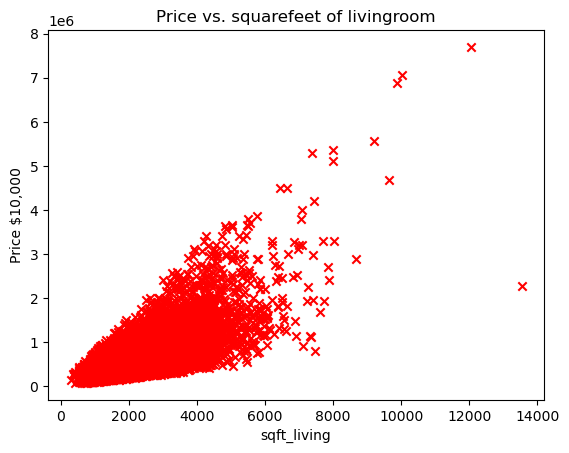

In [10]:
# Create a scatter plot of the data. To change the markers to red "x",
# we used the 'marker' and 'c' parameters
plt.scatter(x_train, y_train, marker='x', c='r') 

# Set the title
plt.title("Price vs. squarefeet of livingroom")
# Set the y-axis label
plt.ylabel('Price $10,000')
# Set the x-axis label
plt.xlabel('sqft_living')
plt.show()

Your goal is to build a linear regression model to fit this data.

<a name="4"></a>
## 4 - Refresher on linear regression

In this practice lab, you will fit the linear regression parameters $(w,b)$ to your dataset.
- The model function for linear regression, which is a function that maps from `x` (city population) to `y` (your restaurant's monthly profit for that city) is represented as 
    $$f_{w,b}(x) = wx + b$$
    

- To train a linear regression model, you want to find the best $(w,b)$ parameters that fit your dataset.  

    - To compare how one choice of $(w,b)$ is better or worse than another choice, you can evaluate it with a cost function $J(w,b)$
      - $J$ is a function of $(w,b)$. That is, the value of the cost $J(w,b)$ depends on the value of $(w,b)$.
  
    - The choice of $(w,b)$ that fits your data the best is the one that has the smallest cost $J(w,b)$.


- To find the values $(w,b)$ that gets the smallest possible cost $J(w,b)$, you can use a method called **gradient descent**. 
  - With each step of gradient descent, your parameters $(w,b)$ come closer to the optimal values that will achieve the lowest cost $J(w,b)$.
  

- The trained linear regression model can then take the input feature $x$ (city population) and output a prediction $f_{w,b}(x)$ (predicted monthly profit for a restaurant in that city).

<a name="5"></a>
## 5 - Compute Cost

Gradient descent involves repeated steps to adjust the value of your parameter $(w,b)$ to gradually get a smaller and smaller cost $J(w,b)$.
- At each step of gradient descent, it will be helpful for you to monitor your progress by computing the cost $J(w,b)$ as $(w,b)$ gets updated. 
- In this section, you will implement a function to calculate $J(w,b)$ so that you can check the progress of your gradient descent implementation.

#### Cost function
As you may recall from the lecture, for one variable, the cost function for linear regression $J(w,b)$ is defined as

$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2$$ 

- You can think of $f_{w,b}(x^{(i)})$ as the model's prediction of your restaurant's profit, as opposed to $y^{(i)}$, which is the actual profit that is recorded in the data.
- $m$ is the number of training examples in the dataset

#### Model prediction

- For linear regression with one variable, the prediction of the model $f_{w,b}$ for an example $x^{(i)}$ is representented as:

$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b$$

This is the equation for a line, with an intercept $b$ and a slope $w$

#### Implementation

Please complete the `compute_cost()` function below to compute the cost $J(w,b)$.

<a name="ex01"></a>
### Exercise 1

Complete the `compute_cost` below to:

* Iterate over the training examples, and for each example, compute:
    * The prediction of the model for that example 
    $$
    f_{wb}(x^{(i)}) =  wx^{(i)} + b 
    $$
   
    * The cost for that example  $$cost^{(i)} =  (f_{wb} - y^{(i)})^2$$
    

* Return the total cost over all examples
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} cost^{(i)}$$
  * Here, $m$ is the number of training examples and $\sum$ is the summation operator

If you get stuck, you can check out the hints presented after the cell below to help you with the implementation.

In [11]:
# def compute_cost(x, y, w, b):
#     m = x.shape[0]
#     f_wb = lambda xi: w * xi + b
#     cost_func = lambda xi, yi: (f_wb(xi) - yi)**2
#     costs = [cost_func(xi, yi) for xi, yi in zip(x, y)]
#     return sum(costs)/(2*m)

In [12]:
def compute_cost(x,y,w,b):
    return 1/(2*len(x)) * np.sum((w*x + b - y)**2)

In [13]:
# Compute cost with some initial values for paramaters w, b
initial_w = 2
initial_b = 1

cost = compute_cost(x_train, y_train, initial_w, initial_b)
print(type(cost))
print(f'Cost at initial w: {cost:.3f}')

<class 'numpy.float64'>
Cost at initial w: 210525407253.538


<a name="6"></a>
## 6 - Gradient descent 

In this section, you will implement the gradient for parameters $w, b$ for linear regression. 

As described in the lecture videos, the gradient descent algorithm is:

$$\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & \phantom {0000} b := b -  \alpha \frac{\partial J(w,b)}{\partial b} \newline       \; & \phantom {0000} w := w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{1}  \; & 
\newline & \rbrace\end{align*}$$

where, parameters $w, b$ are both updated simultaniously and where  
$$
\frac{\partial J(w,b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{2}
$$
$$
\frac{\partial J(w,b)}{\partial w}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) -y^{(i)})x^{(i)} \tag{3}
$$
* m is the number of training examples in the dataset

    
*  $f_{w,b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$, is the target value


You will implement a function called `compute_gradient` which calculates $\frac{\partial J(w)}{\partial w}$, $\frac{\partial J(w)}{\partial b}$ 

### Exercise 2

Please complete the `compute_gradient` function to:

* Iterate over the training examples, and for each example, compute:
    * The prediction of the model for that example 
    $$
    f_{wb}(x^{(i)}) =  wx^{(i)} + b 
    $$
   
    * The gradient for the parameters $w, b$ from that example 
        $$
        \frac{\partial J(w,b)}{\partial b}^{(i)}  =  (f_{w,b}(x^{(i)}) - y^{(i)}) 
        $$
        $$
        \frac{\partial J(w,b)}{\partial w}^{(i)}  =  (f_{w,b}(x^{(i)}) -y^{(i)})x^{(i)} 
        $$
    

* Return the total gradient update from all the examples
    $$
    \frac{\partial J(w,b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} \frac{\partial J(w,b)}{\partial b}^{(i)}
    $$
    
    $$
    \frac{\partial J(w,b)}{\partial w}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} \frac{\partial J(w,b)}{\partial w}^{(i)} 
    $$
  * Here, $m$ is the number of training examples and $\sum$ is the summation operator

If you get stuck, you can check out the hints presented after the cell below to help you with the implementation.

In [14]:
# def compute_gradient(x, y, w, b): 
#     m = x.shape[0]
#     f_wb = lambda xi: w * xi + b
#     dj_dw_func = lambda xi, yi: (f_wb(xi) - yi) * xi
#     dj_db_func = lambda xi, yi: f_wb(xi) - yi
#     dj_dw = sum([dj_dw_func(xi, yi) for xi, yi in zip(x, y)]) / m
#     dj_db = sum([dj_db_func(xi, yi) for xi, yi in zip(x, y)]) / m
#     return dj_dw, dj_db

In [15]:
def compute_gradient(x, y, w, b):
    return 1/len(x) * np.sum((w*x + b - y)*x),1/len(x) * np.sum((w*x + b - y))

In [16]:
# Compute and display gradient with w initialized to zeroes
initial_w = 0
initial_b = 0

tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, initial_w, initial_b)
print('Gradient at initial w, b (zeros):', tmp_dj_dw, tmp_dj_db)



Gradient at initial w, b (zeros): -1360033662.4738815 -540088.1417665294


In [17]:
test_w = 0.2
test_b = 0.2
tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, test_w, test_b)

print('Gradient at test w, b:', tmp_dj_dw, tmp_dj_db)

Gradient at test w, b: -1358999350.9808729 -539671.9618192754


<a name="2.6"></a>
### 2.6 Learning parameters using batch gradient descent 

You will now find the optimal parameters of a linear regression model by using batch gradient descent. Recall batch refers to running all the examples in one iteration.
- You don't need to implement anything for this part. Simply run the cells below. 

- A good way to verify that gradient descent is working correctly is to look
at the value of $J(w,b)$ and check that it is decreasing with each step. 

- Assuming you have implemented the gradient and computed the cost correctly and you have an appropriate value for the learning rate alpha, $J(w,b)$ should never increase and should converge to a steady value by the end of the algorithm.

In [18]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x :    (ndarray): Shape (m,)
      y :    (ndarray): Shape (m,)
      w_in, b_in : (scalar) Initial values of parameters of the model
      cost_function: function to compute cost
      gradient_function: function to compute the gradient
      alpha : (float) Learning rate
      num_iters : (int) number of iterations to run gradient descent
    Returns
      w : (ndarray): Shape (1,) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """
    
    # number of training examples
    m = len(x)
    
    # An array to store cost J and w's at each iteration — primarily for graphing later
    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_dw, dj_db = gradient_function(x, y, w, b )  

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(x, y, w, b)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w, b, J_history, w_history #return w and J,w history for graphing

In [19]:
# initialize fitting parameters. Recall that the shape of w is (n,)
initial_w = 0.
initial_b = 0.

# some gradient descent settings
iterations = 30
alpha = 0.01

w,b,_,_ = gradient_descent(x_train ,y_train, initial_w, initial_b, 
                     compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent:", w, b)

Iteration    0: Cost 478078607970701082624.00   
Iteration    3: Cost 9122823133910272595803954900396343470312589885440.00   
Iteration    6: Cost 174084137108442083129363796664304193390555353432398266702796348624810677370880.00   
Iteration    9: Cost 3321919799162133852046114759934057305187542392028226462539348198754412690780269175788060709757792475414528.00   
Iteration   12: Cost 63389757018419599831675223144202525612356016096819315044544742686533703104522852264988089241313577689034780970169292731136645147918336.00   
Iteration   15: Cost 1209620200905445147373122593917747208087176087733719988205780786811997242077227193159441964069451858878364604716001882156441303999035394975657208397294188604948480.00   
Iteration   18: Cost 23082294352593322832406454795070154765281821087941846571406225006628979436105076774535171897707100429443038811011874132887658095051124033409641273357245180353290643896153429700697980118499328.00   
Iteration   21: Cost 44046247919879876105170795729209460320051

We will now use the final parameters from gradient descent to plot the linear fit. 

Recall that we can get the prediction for a single example $f(x^{(i)})= wx^{(i)}+b$. 

To calculate the predictions on the entire dataset, we can loop through all the training examples and calculate the prediction for each example. This is shown in the code block below.

In [20]:
m = x_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * x_train[i] + b

Text(0.5, 0, 'Population of City in 10,000s')

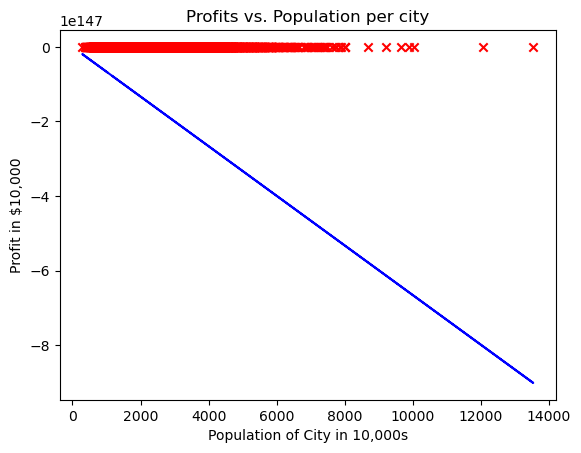

In [21]:
# Plot the linear fit
plt.plot(x_train, predicted, c = "b")

# Create a scatter plot of the data. 
plt.scatter(x_train, y_train, marker='x', c='r') 

# Set the title
plt.title("Profits vs. Population per city")
# Set the y-axis label
plt.ylabel('Profit in $10,000')
# Set the x-axis label
plt.xlabel('Population of City in 10,000s')

In [22]:
predict1 = 3.5 * w + b
print('For population = 35,000, we predict a profit of $%.2f' % (predict1*10000))

predict2 = 7.0 * w + b
print('For population = 70,000, we predict a profit of $%.2f' % (predict2*10000))

For population = 35,000, we predict a profit of $-23300788470922687474225834620139698418419893992724646792558496520865217781493060344303494447289795350613874256006807637460857838093811377241323470848.00
For population = 70,000, we predict a profit of $-46598898708517099997173857427770864261515752202637904809656349738966760730630301537063296514679551745005597104153658089261357199108893844915596820480.00


its seems a vailure :(. I'll come back here in future.